# Library

In [4]:
# pip install google-play-scraper

# import library
from google_play_scraper import app, reviews, Sort, reviews_all

In [5]:
import pandas as pd
pd.options.mode.chained_assignment = None # menonatifkan peringatan chaining

import numpy as np 
seed = 0
np.random.seed(seed) # Mengatur seed untuk reproduktibilitas

import matplotlib.pyplot as plt # Visualisasi data
import seaborn as sns # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt # Manipulasi data waktu dan tanggal
import re # Modul untuk bekerja dengan ekspresi reguler
import string # berisi konstanta string, seperti tanda baca

from nltk.tokenize import word_tokenize # Tokenisasia teks
from nltk.corpus import stopwords # Daftar kata-kata berhenti dalam teks

# pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Stemming (penghilangan imbuhan kata)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # Menghapus stopwords

from wordcloud import WordCloud # Membuat visualisasi berbentuk awan kata 

import nltk # Import pustaka NLTK (Natural Language Toolkit)
nltk.download('punkt') # Mengunduh dataset yang diperlukan untuk tokenisasi teks
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam bahasa indonesia

C:\Users\azkan\AppData\Local\Temp\ipykernel_40764\1622370964.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azkan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azkan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scraping Dataset

menggunakan library 'google_play_scraper' untuk mengakses ulasan dan informasi aplikasi dari Google Play Store. Dalam kode ini, kita menggunakan fungsi `reviews_all()` untuk mengambil semua ulasan dari aplikasi tersebut.

In [6]:
from google_play_scraper import app, reviews_all, Sort

In [7]:
# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.byu.id',          # ID aplikasi
    lang='id',             # Bahasa ulasan (default: 'en')
    country='id',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=1000             # Jumlah maksimum ulasan yang ingin diambil
)


# Loading Dataset

In [8]:
# Menyimpan ulasan dalam file csv
import csv

with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

In [9]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ae75ea02-47b6-43a6-9853-344bb45f0455,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Perbaikin dulu aplikasinya, jaringan stabil be...",3,43,1.55.0,2024-06-26 23:25:12,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-06-27 21:56:30,1.55.0
1,85d141d6-fce7-4d4e-a016-a665633fe5b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jadi saya akan mulai dengan memberitahu bahwa ...,1,8,1.55.0,2024-07-10 22:55:50,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-10 23:42:24,1.55.0
2,7095b585-ce65-49f9-a9ee-170773fb55df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk kecepatan jaringan mohon lebih ditingkat...,1,1,1.55.0,2024-07-10 09:13:18,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-10 21:13:07,1.55.0
3,cc4fbfad-d0a0-495a-a7ce-00ba02478e16,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolonglah ya buat aplikasi By.U ini, sering ba...",1,99,1.55.0,2024-07-03 21:31:55,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-03 21:34:55,1.55.0
4,d67e1a7a-12ad-4c0c-93a0-b7c184126420,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jaringan nya kadang lelet banget dan sekarang ...,3,44,1.55.0,2024-06-16 08:26:36,"Halo, pagi Kak :) Maaf banget ya Kak jadi biki...",2024-06-16 08:31:31,1.55.0


## Make a File

In [10]:
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

In [11]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam Dataframe
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
    
# Menampilkan
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ae75ea02-47b6-43a6-9853-344bb45f0455,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Perbaikin dulu aplikasinya, jaringan stabil be...",3,43,1.55.0,2024-06-26 23:25:12,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-06-27 21:56:30,1.55.0
1,85d141d6-fce7-4d4e-a016-a665633fe5b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jadi saya akan mulai dengan memberitahu bahwa ...,1,8,1.55.0,2024-07-10 22:55:50,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-10 23:42:24,1.55.0
2,7095b585-ce65-49f9-a9ee-170773fb55df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk kecepatan jaringan mohon lebih ditingkat...,1,1,1.55.0,2024-07-10 09:13:18,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-10 21:13:07,1.55.0
3,cc4fbfad-d0a0-495a-a7ce-00ba02478e16,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolonglah ya buat aplikasi By.U ini, sering ba...",1,99,1.55.0,2024-07-03 21:31:55,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-03 21:34:55,1.55.0
4,d67e1a7a-12ad-4c0c-93a0-b7c184126420,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jaringan nya kadang lelet banget dan sekarang ...,3,44,1.55.0,2024-06-16 08:26:36,"Halo, pagi Kak :) Maaf banget ya Kak jadi biki...",2024-06-16 08:31:31,1.55.0


# EDA

## Menampilkan informasi tentang DataFrame app_reviews_df

In [12]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135056 entries, 0 to 135055
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              135056 non-null  object        
 1   userName              135056 non-null  object        
 2   userImage             135056 non-null  object        
 3   content               135055 non-null  object        
 4   score                 135056 non-null  int64         
 5   thumbsUpCount         135056 non-null  int64         
 6   reviewCreatedVersion  113729 non-null  object        
 7   at                    135056 non-null  datetime64[ns]
 8   replyContent          119081 non-null  object        
 9   repliedAt             119081 non-null  datetime64[ns]
 10  appVersion            113729 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 11.3+ MB


terdapat 11 kolom dengan 135,058 baris

## Menghapus baris yang memiliki nilai yang hilang

In [13]:
clean_df = app_reviews_df.dropna()

## Menghapus baris duplikat 

In [14]:
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99953 entries, 0 to 128603
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              99953 non-null  object        
 1   userName              99953 non-null  object        
 2   userImage             99953 non-null  object        
 3   content               99953 non-null  object        
 4   score                 99953 non-null  int64         
 5   thumbsUpCount         99953 non-null  int64         
 6   reviewCreatedVersion  99953 non-null  object        
 7   at                    99953 non-null  datetime64[ns]
 8   replyContent          99953 non-null  object        
 9   repliedAt             99953 non-null  datetime64[ns]
 10  appVersion            99953 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.2+ MB


hasil akhir menjadi 99,977 baris

# Preprocessing Text

Preprocessing text adalah proses membersihkan, memproses, dan mempersiapkan teks mentah agar dapat diolah lebih lanjut dengan tepat dan akurat. Langkah-langkah preprocessing ini bertujuan menghilangkan noise, mengonversi teks ke format yang konsisten, serta mengekstraksi fitur-fitur penting untuk analisis lebih lanjut.

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

In [16]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

modul `re` dalam python digunakan untuk mnecari, mencocokan, dan memodifikasi string menggunakan pola yang didefinisikan.
- `re.sub()` ini menggantikan semua kemunculan pola dengan string pengganti

In [17]:
# Mengubah semua karakter dalam teks menjadi huruf kecil
def casefoldingText(text):  
    text = text.lower()
    return text

# Memecah atau membagi string, teks menjadi daftar token
def tokenizingText(text):
    text = word_tokenize(text)
    return text

## Menghapus stopwords dalam text

In [18]:
def filteringText(text):
    try:
        # Ambil daftar stopwords bahasa Indonesia dari NLTK
        listStopwords = set(stopwords.words('indonesian'))
    except LookupError:
        # Jika tidak tersedia, gunakan stopwords manual
        listStopwords = set([
        'yang', 'di', 'dan', 'untuk', 'dari', 'pada', 'dengan', 'atau', 'adalah', 'ini', 'itu', 'ke', 'sebagai', 'kami', 'kita',
        'saya', 'sudah', 'belum', 'sangat', 'besar', 'lebih', 'bisa', 'apa', 'dapat', 'ini', 'itu', 'yang', 'dengan', 'di', 'daripada',
        'oleh', 'seperti', 'namun', 'mereka', 'bagi', 'dalam', 'akan', 'tersebut', 'kepada', 'juga', 'kalau', 'secara', 'hanya', 
        'karena', 'antara', 'ada', 'saat', 'bahwa', 'hingga', 'oleh', 'ia', 'menjadi', 'ketika', 'salah', 'maka', 'selama', 'lagi', 
        'sedang', 'sekitar', 'bahkan', 'tanpa', 'lebih', 'tentang', 'beberapa', 'selain', 'misalnya', 'cukup', 'begitu', 'baik', 
        'sekali', 'selalu', 'bukan', 'pernah', 'setelah', 'seperti', 'banyak', 'harus', 'atau', 'benar', 'masih', 'semua', 'lebih', 
        'maka', 'belum', 'bisa', 'sebab', 'yang', 'itu', 'hanya', 'walau', 'dari', 'oleh', 'seperti', 'mengapa', 'dimana', 'setiap', 
        'bagaimana', 'jadi', 'paling', 'tetapi', 'apakah', 'sampai', 'kalau', 'kembali', 'kemudian', 'maupun', 'seluruh', 'demikian',
        'kepada', 'diri', 'antar', 'atas', 'dengan', 'terhadap', 'sering', 'kali', 'maupun', 'mereka', 'ia', 'seperti', 'mengapa', 
        'serta', 'bahwa', 'memang', 'oleh', 'antara', 'seolah', 'lain', 'padahal', 'terhadap', 'demi', 'demikian', 'menurut', 'tanpa', 
        'agar', 'atau', 'walaupun', 'sehingga', 'dapat', 'yakni', 'kalau', 'tetapi', 'walaupun', 'dimana', 'terhadap', 'sesuai', 
        'begitu', 'namun', 'seperti', 'terutama', 'sebab', 'melalui', 'demi', 'hal', 'karena', 'bahwa', 'untuk', 'bila', 'berikut', 
        'antara', 'namun', 'yakni', 'sementara', 'ketika', 'terhadap', 'mereka', 'setiap', 'bahwa', 'tersebut', 'dimana', 'oleh',
        'baik', 'bahkan', 'dengan', 'misalnya', 'sebab', 'mengenai', 'sedangkan', 'demikian', 'ketika', 'tersebut', 'sebagaimana', 
        'tetapi', 'karena', 'hal', 'demikian', 'jika', 'dalam', 'mengapa', 'tanpa', 'sesuatu', 'tetapi', 'jadi', 'lagi', 'atas', 
        'daripada', 'seperti', 'dimana', 'kepada', 'seolah', 'bahwa', 'hanya', 'yang', 'sebab', 'dimana', 'ia', 'maupun', 'terhadap'
    ])

    
    # Ambil daftar stopwords bahasa Inggris dari NLTK
    listStopwords1 = set(stopwords.words('english'))
    
    # Gabungkan stopwords bahasa inggris ke dalam set stopwords bahasa indonesia
    listStopwords.update(listStopwords1)
    # Tambahkan beberapa stopwords tambahan yang sering muncul dalam teks
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    
    # Buat lis kosong
    filtered = []
    
    # Memerikan setiap kata dalam teks
    for txt in text:
        # jika tidak ada dalam list stopwords, maka tambahkan ke list filtered
        if txt not in listStopwords:
            filtered.append(txt)
        
    text = filtered
    return text

## Steaming Text

Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata

In [19]:
def stemmingText(text):
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    # Memecah teks menjadi daftar kata
    words = text.split()
    
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

## Mengubah daftar kata menjadi kalimat

In [20]:
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

## Penghapusan slang words

Misalnya, "abis" merupakan singkatan dari "habis", "wtb" merupakan singkatan dari "beli", dan seterusnya

In [21]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [22]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    
    for word in words: 
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
            
    fixed_text = ' '.join(fixed_words)
    return fixed_text

## Apply

In [23]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [24]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,ae75ea02-47b6-43a6-9853-344bb45f0455,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Perbaikin dulu aplikasinya, jaringan stabil be...",3,43,1.55.0,2024-06-26 23:25:12,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-06-27 21:56:30,1.55.0,Perbaikin dulu aplikasinya jaringan stabil beg...,perbaikin dulu aplikasinya jaringan stabil beg...,perbaikin dulu aplikasinya jaringan stabil beg...,"[perbaikin, dulu, aplikasinya, jaringan, stabi...","[perbaikin, aplikasinya, jaringan, stabil, buk...",perbaikin aplikasinya jaringan stabil buka apl...
1,85d141d6-fce7-4d4e-a016-a665633fe5b4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jadi saya akan mulai dengan memberitahu bahwa ...,1,8,1.55.0,2024-07-10 22:55:50,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-10 23:42:24,1.55.0,Jadi saya akan mulai dengan memberitahu bahwa ...,jadi saya akan mulai dengan memberitahu bahwa ...,jadi saya akan mulai dengan memberitahu bahwa ...,"[jadi, saya, akan, mulai, dengan, memberitahu,...","[memberitahu, hotspot, teman, jaringan, byu, b...",memberitahu hotspot teman jaringan byu buruk m...
2,7095b585-ce65-49f9-a9ee-170773fb55df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk kecepatan jaringan mohon lebih ditingkat...,1,1,1.55.0,2024-07-10 09:13:18,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-10 21:13:07,1.55.0,Untuk kecepatan jaringan mohon lebih ditingkat...,untuk kecepatan jaringan mohon lebih ditingkat...,untuk kecepatan jaringan mohon lebih ditingkat...,"[untuk, kecepatan, jaringan, mohon, lebih, dit...","[kecepatan, jaringan, mohon, ditingkatkan, mai...",kecepatan jaringan mohon ditingkatkan main gam...
3,cc4fbfad-d0a0-495a-a7ce-00ba02478e16,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolonglah ya buat aplikasi By.U ini, sering ba...",1,99,1.55.0,2024-07-03 21:31:55,"Hi, Kak. Maaf banget jadi bikin gak nyaman. Ni...",2024-07-03 21:34:55,1.55.0,Tolonglah ya buat aplikasi ByU ini sering bang...,tolonglah ya buat aplikasi byu ini sering bang...,tolonglah iya buat aplikasi byu ini sering ban...,"[tolonglah, iya, buat, aplikasi, byu, ini, ser...","[tolonglah, aplikasi, byu, banget, sinyal, hil...",tolonglah aplikasi byu banget sinyal hilang e ...
4,d67e1a7a-12ad-4c0c-93a0-b7c184126420,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jaringan nya kadang lelet banget dan sekarang ...,3,44,1.55.0,2024-06-16 08:26:36,"Halo, pagi Kak :) Maaf banget ya Kak jadi biki...",2024-06-16 08:31:31,1.55.0,Jaringan nya kadang lelet banget dan sekarang ...,jaringan nya kadang lelet banget dan sekarang ...,jaringan nya kadang lambat banget dan sekarang...,"[jaringan, nya, kadang, lambat, banget, dan, s...","[jaringan, kadang, lambat, banget, aplikasinya...",jaringan kadang lambat banget aplikasinya terb...


# Pelabelan

pelabelan adalah proses pemberian kategori atau label pada setiap entri data berdasarkan informasi yang tersedia

## Meminta data untuk kata kata positif

In [25]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari Github
lexicon_positive = dict() 

# Mengirim perminatatn HTTP untuk mendapatkan file csv dari github
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# Jika permintaaan berhasil
if response.status_code == 200:
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
    reader = csv.reader(StringIO(response.text), delimiter=',')
    
    # Mengulangi setiap baris dalam file csv
    for row in reader:
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
        lexicon_positive[row[0]] = int(row[1])
    
else:
    print("Failder to fetch positive lexicon data")
        


## Meminta data untuk kata kata negatif

In [26]:
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

# Mengirim perminatatn HTTP untuk mendapatkan file csv dari githu
response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv")

# Jika permintaan berhasil
if response.status_code == 200:
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
    reader = csv.reader(StringIO(response.text), delimiter=',')
    
    # Mengulangi setiap baris dalam file CSV
    for row in reader:
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
        lexicon_negative[row[0]] = int(row[1])
        
else:
    print("Failed to fetch negative lexion data")

## Fungsi untuk menentukan polaritas sentimen dari tweet

fungsi ini akan memeriksa setiap kata pada teks, jika tepat, skor sentimen akan ditambahkan atau dikurangkan sesuai dengan skor kata tersebut dalam kamus. Skor sentimen akan digunakan untuk menentukan polaritas teks, positif atau negatif

In [27]:
def sentiment_analysis_lexicon_indonesia(text):
    # inisialisasi skor sentimen ke 0
    score = 0
    
    # Mengulangi setiap kata dalam teks
    for word in text:
        # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
        if(word in lexicon_positive):
            score = score + lexicon_positive[word]
     
    # Mengulangi setiap kata dalam teks        
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    
    # inisialisasi variabel polaritas        
    polarity = ''
    # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    if(score >= 0):
        polarity = 'positive'
    # Jika skor sentimen kuran dari 0, maka polaritas adalah negatif
    elif(score < 0):
        polarity = 'negative'
        
        
    return score, polarity

## Apply

In [28]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

results = list(zip(*results))

clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())


polarity
positive    62660
negative    37293
Name: count, dtype: int64


In [29]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99953 entries, 0 to 128603
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              99953 non-null  object        
 1   userName              99953 non-null  object        
 2   userImage             99953 non-null  object        
 3   content               99953 non-null  object        
 4   score                 99953 non-null  int64         
 5   thumbsUpCount         99953 non-null  int64         
 6   reviewCreatedVersion  99953 non-null  object        
 7   at                    99953 non-null  datetime64[ns]
 8   replyContent          99953 non-null  object        
 9   repliedAt             99953 non-null  datetime64[ns]
 10  appVersion            99953 non-null  object        
 11  text_clean            99953 non-null  object        
 12  text_casefoldingText  99953 non-null  object        
 13  text_slangwords     

## Visualisasi

### Pie Chart

['positive', 'negative']
[62660 37293]


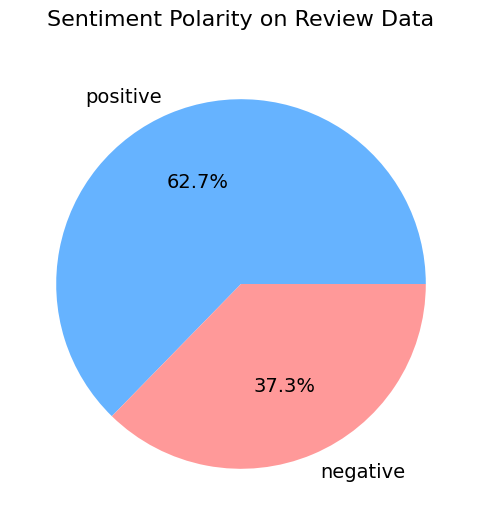

In [30]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan mentimpannya dalam list 'sizes'
# sizes = [count for count in clean_df['polarity'].value_counts()] 
sizes = clean_df['polarity'].value_counts()
sizes = sizes.values

labels = list(clean_df['polarity'].value_counts().index)

print(labels)
print(sizes)

colors = ['#66b3ff','#ff9999']

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

Hasil dari value_counts() adalah sebuah Series pandas di mana indeksnya adalah nilai unik dari kolom, dan nilai di Series tersebut adalah jumlah kemunculannya.

Dari piechart didapatkan 62,6% persen dari sentimen positive dan 37,4% sentimen negative

### Distribusi Kata

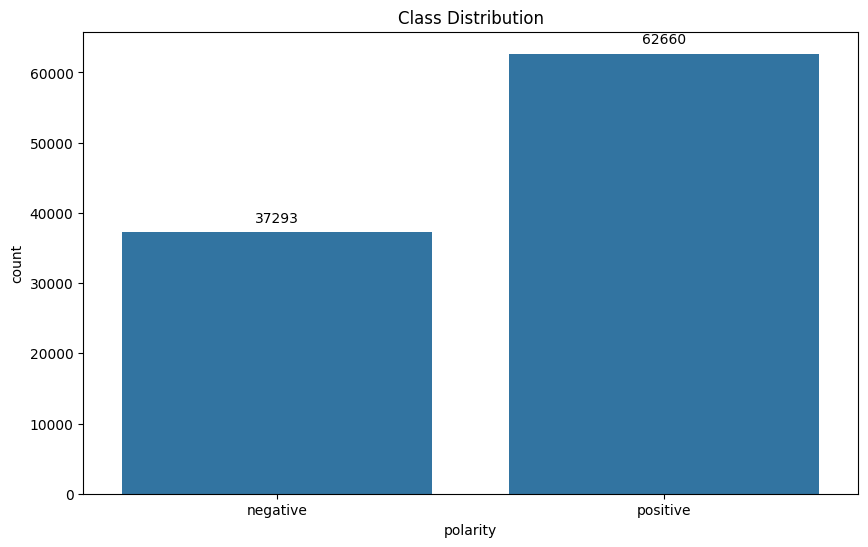

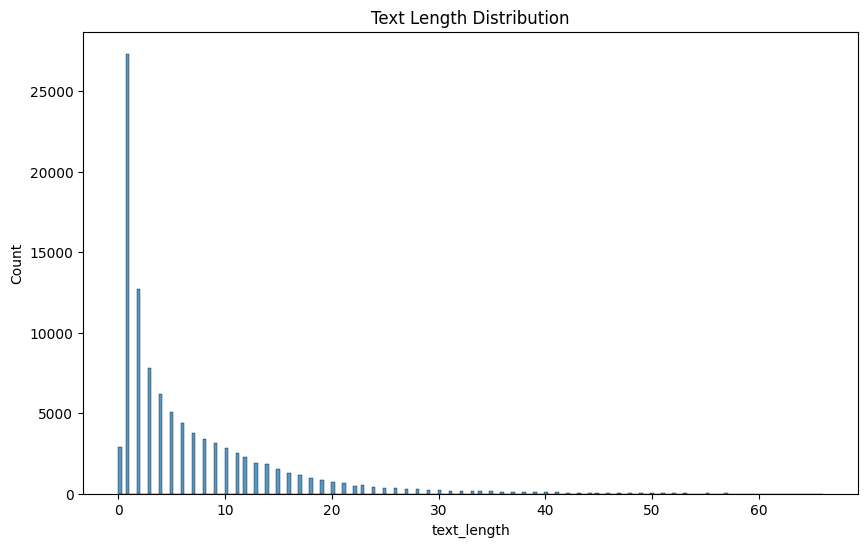

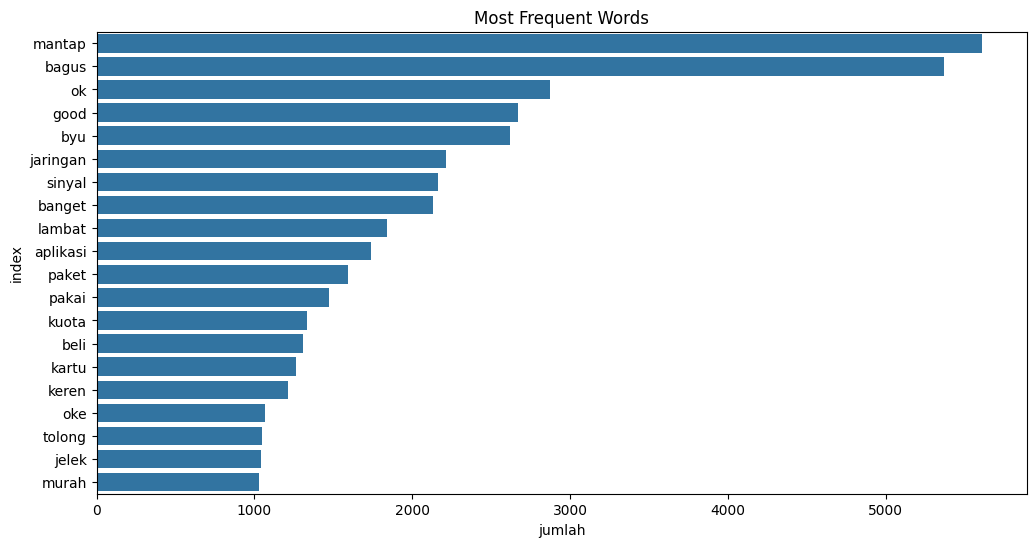

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

plt.figure(figsize=(10, 6))

clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# Split

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengen TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

features_df.head()

,aktif,aktivasi,akun,aman,aneh,apk,aplikasi,aplikasinya,app,bagus,...,turun,uang,udh,ulang,unlimited,update,via,wifi,yah,youtube
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.215213,0.282194,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.293434,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.691864,0.0,0.0,0.0,0.0,0.0,0.197932,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.236282,0.0,0.161737,...,0.0,0.0,0.0,0.298456,0.0,0.245694,0.0,0.0,0.0,0.0


# Modeling

## Menggunakan Pemodelan Naive Bayes (NB)

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [34]:
# Membuat objek model Naive Bayes
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7941272104249518
Naive Bayes - accuracy_test: 0.7936071232054425


## Menggunakan Logstic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9124709236887522
Logistic Regression - accuracy_test: 0.9114601570706818


## Menggunakan Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9728996273229784
Random Forest - accuracy_test: 0.8967535390925917


## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9729121332633001
Decision Tree - accuracy_test: 0.866589965484468


# Result

In [38]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.793607
1        Random Forest       0.896754
2  Logistic Regression       0.911460
3        Decision Tree       0.866590


In [39]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)

                 Model  Accuracy Test
2  Logistic Regression       0.911460
1        Random Forest       0.896754
3        Decision Tree       0.866590
0          Naive Bayes       0.793607


Dari data di atas kita dapat melihat bahwa Logistic Regression adalah model terbaik dalam kasus ini, diikuti oleh Random Forest, Decision Tree, Naive Bayes. Maka kita akan menggunakan logistic regression

In [45]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")
# input : 'aplikasi yang lelet ketika log in dan memilikki UI/UX yang jelek'

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Sentimen kalimat baru adalah POSITIF.
